## Tic-Tac-Toe Agent
​
In this notebook, you will learn to build an RL agent (using Q-learning) that learns to play Numerical Tic-Tac-Toe with odd numbers. The environment is playing randomly with the agent, i.e. its strategy is to put an even number randomly in an empty cell. The following is the layout of the notebook:
        - Defining epsilon-greedy strategy
        - Tracking state-action pairs for convergence
        - Define hyperparameters for the Q-learning algorithm
        - Generating episode and applying Q-update equation
        - Checking convergence in Q-values

#### Importing libraries
Write the code to import Tic-Tac-Toe class from the environment file

In [1]:
#Installing gym for the first time
#!pip install gym

In [2]:
# from <TC_Env> import <TicTacToe> - import your class from environment file

from TCGame_Env1 import TicTacToe
import collections
import numpy as np
import random
import pickle
import time
from matplotlib import pyplot as plt

In [3]:
# Function to convert state array into a string to store it as keys in the dictionary
# states in Q-dictionary will be of form: x-4-5-3-8-x-x-x-x
#   x | 4 | 5
#   ----------
#   3 | 8 | x
#   ----------
#   x | x | x

def Q_state(state):

    return ('-'.join(str(e) for e in state)).replace('nan','x')

In [4]:
# Defining a function which will return valid (all possible actions) actions corresponding to a state
# Important to avoid errors during deployment.

def valid_actions(state):

    valid_Actions = []
    
    valid_Actions = [i for i in env.action_space(state)[0]] ###### -------please call your environment as env
    return valid_Actions

In [5]:
# Defining a function which will add new Q-values to the Q-dictionary. 
def add_to_dict(state):
    state1 = Q_state(state)
    
    valid_act = valid_actions(state)
    if state1 not in Q_dict.keys():
        for action in valid_act:
            Q_dict[state1][action]=0

#### Epsilon-greedy strategy - Write your code here

(you can build your epsilon-decay function similar to the one given at the end of the notebook)

In [6]:
# Defining epsilon-greedy policy. You can choose any function epsilon-decay strategy

def epsilon_greedy(state,episode):
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate*episode)
    z = np.random.random()
    
    if z > epsilon:
         state_ep_greedy=Q_state(state)
         action = max(Q_dict[state_ep_greedy],key=Q_dict[state_ep_greedy].get)   #Exploitation to make use of the already learnt action's for the state
    else:
         valid_action_list= valid_actions(state)
         action =  valid_action_list[np.random.choice(range(len(valid_action_list)))]   #Exploration to try new actions that are Valid.
    
    return action


In [7]:
# Defining epsilon-greedy policy. You can choose any function epsilon-decay strategy
def epsilon_greedy(state, time):
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate*time)
    # print(epsilon)
    z = np.random.random()
        
    if z > epsilon:
        state1 = Q_state(state)
        action = max(Q_dict[state1],key=Q_dict[state1].get)   #Exploitation: this gets the action corresponding to max q-value of current state
    else:
        possible_action = [i for i in env.action_space(state)[0]]        
        action = possible_action[np.random.choice(range(len(possible_action)))]    #Exploration: randomly choosing and action
    
    return action

#### Tracking the state-action pairs for checking convergence - write your code here

#### If a Q-dictionary does not exist, run the following cell to initialise an empty dictionary:

In [8]:
# Initialise Q_dictionary as 'Q_dict' and States_tracked as 'States_track' (for convergence)

Q_dict = collections.defaultdict(dict)

States_track = collections.defaultdict(dict)

print(len(Q_dict))
print(len(States_track))

0
0


In [9]:
# Initialise states to be tracked
#Tracking  States is helpful to check if they are Converging.
def initialise_tracking_states():
    states_list_tracking = [('x-x-x-2-5-x-x-x-x',(5,7)),('x-3-x-2-x-x-x-x-x',(4,1)),('1-4-x-x-x-x-x-x-x',(4,5)),('x-2-x-x-x-x-x-7-x',(2,3))]
    for q_values in  states_list_tracking:
        state = q_values[0]
        action = q_values[1]
        States_track[state][action] = []

In [10]:
#Defining a function to save the Q-dictionary as a pickle file

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [11]:
def save_tracking_states():
    for state in States_track.keys():
        for action in States_track[state].keys():
            if state in Q_dict and action in Q_dict[state]:
                States_track[state][action].append(Q_dict[state][action])

In [12]:
initialise_tracking_states()

#### Define hyperparameters  and trying the different Combinations of the Hyperparameters.

In [22]:
# EPISODES,epsilon (decay rate), learning-rate, discount factor
EPISODES = 5000000
LR = 0.001 #LR
gamma = 0.9  #discount factor
max_epsilon = 1.0
min_epsilon = 0.001
#decay_rate = 0.0001
decay_rate = 0.0001

#threshold = 1000       #every these many episodes, the 4 Q-values will be stored/appended (convergence graphs)
threshold = 2000
#policy_threshold = 10000    #every these many episodes, the Q-dict will be updated
policy_threshold = 10000


### Q-update loop ---write your code here

In [14]:
start_time = time.time()

draw_cnt=0
win_cnt=0
loss_cnt=0

for episode in range(EPISODES):
    ##### Start writing your code from the next line
    env = TicTacToe()      #creating an instance of the class
    #Initializing the values and storing them
    terminal_check = False
    curr_state = env.state  # Initial State
    add_to_dict(curr_state)
    #print('curr_state',curr_state)

    
    while not terminal_check:
        curr_state_save= Q_state(curr_state)
        #Using the Epsilon Greedy approach to see we are picking the Right action among Exploration/Exploitation
        curr_action=epsilon_greedy(curr_state,episode)
        #Calling the Step function to capture the next state,reward and state of the Game to see if its terminal state
        next_state,reward,terminal_check=env.step(curr_state,curr_action)
        add_to_dict(next_state)
        next_state_save = Q_state(next_state)
        
        #If next state is terminal state the no action is possible so  it will be only Immediate reward.
        #Accoriding update the Q-dictionary for the State-Action Pair
        
        if  terminal_check : 
            #print('curr_state_save',curr_state_save)
            #print('reward',reward)
            Q_dict[curr_state_save][curr_action] += LR*((reward)-Q_dict[curr_state_save][curr_action])
        else: 
            max_next = max(Q_dict[next_state_save],key=Q_dict[next_state_save].get)   #this gets the action corresponding to max q-value of next state
            Q_dict[curr_state_save][curr_action] += LR*((reward+(gamma*(Q_dict[next_state_save][max_next])))-Q_dict[curr_state_save][curr_action])
            
        curr_state = next_state   #Now this next_state will become as current_state
        
        #Count the number Win's,Draw's and Loss's  as it will helps to ensure the Count Win's are going up and  Count of Loss's are going down
        if reward == 0 :
            draw_cnt += 1
        elif reward == 10:
            win_cnt += 1
        elif reward == -10:
            loss_cnt +=1
            
      
    if ((episode+1) % threshold) == 0:   #every 2000th episode
        save_tracking_states()
        print('Episodes Completed:',episode+1,' Win_Count:',win_cnt,'Loss_Count:',loss_cnt,' Draw_Count: ',draw_cnt, 'Total time:',time.time() - start_time,' seconds')
        save_obj(States_track,'States_tracked')   
    
    #SAVING POLICY
    if ((episode+1)% policy_threshold ) == 0:  #every 30000th episodes, the Q-dict will be saved
        save_obj(Q_dict,'Policy') 
        
    

        
elapsed_time = time.time() - start_time
save_obj(States_track,'States_tracked')   
save_obj(Q_dict,'Policy')


Episodes Completed: 2000  Win_Count: 501 Loss_Count: 545  Draw_Count:  954 Total time: 3.75652813911438  seconds
Episodes Completed: 4000  Win_Count: 1048 Loss_Count: 1067  Draw_Count:  1885 Total time: 5.798841714859009  seconds
Episodes Completed: 6000  Win_Count: 1614 Loss_Count: 1638  Draw_Count:  2748 Total time: 8.431263208389282  seconds
Episodes Completed: 8000  Win_Count: 2174 Loss_Count: 2168  Draw_Count:  3658 Total time: 10.389320611953735  seconds
Episodes Completed: 10000  Win_Count: 2788 Loss_Count: 2654  Draw_Count:  4558 Total time: 13.477086782455444  seconds
Episodes Completed: 12000  Win_Count: 3389 Loss_Count: 3167  Draw_Count:  5444 Total time: 15.751465082168579  seconds
Episodes Completed: 14000  Win_Count: 3952 Loss_Count: 3719  Draw_Count:  6329 Total time: 17.733556985855103  seconds
Episodes Completed: 16000  Win_Count: 4505 Loss_Count: 4213  Draw_Count:  7282 Total time: 21.028281688690186  seconds
Episodes Completed: 18000  Win_Count: 5004 Loss_Count: 4767

Episodes Completed: 138000  Win_Count: 38706 Loss_Count: 36665  Draw_Count:  62629 Total time: 188.83828258514404  seconds
Episodes Completed: 140000  Win_Count: 39286 Loss_Count: 37189  Draw_Count:  63525 Total time: 190.42304348945618  seconds
Episodes Completed: 142000  Win_Count: 39905 Loss_Count: 37711  Draw_Count:  64384 Total time: 194.01341009140015  seconds
Episodes Completed: 144000  Win_Count: 40493 Loss_Count: 38269  Draw_Count:  65238 Total time: 195.59514498710632  seconds
Episodes Completed: 146000  Win_Count: 41101 Loss_Count: 38804  Draw_Count:  66095 Total time: 198.54226160049438  seconds
Episodes Completed: 148000  Win_Count: 41707 Loss_Count: 39322  Draw_Count:  66971 Total time: 201.47940683364868  seconds
Episodes Completed: 150000  Win_Count: 42306 Loss_Count: 39837  Draw_Count:  67857 Total time: 204.9052770137787  seconds
Episodes Completed: 152000  Win_Count: 42925 Loss_Count: 40331  Draw_Count:  68744 Total time: 210.98173809051514  seconds
Episodes Complete

Episodes Completed: 272000  Win_Count: 80578 Loss_Count: 70203  Draw_Count:  121219 Total time: 380.5534565448761  seconds
Episodes Completed: 274000  Win_Count: 81173 Loss_Count: 70722  Draw_Count:  122105 Total time: 382.7236523628235  seconds
Episodes Completed: 276000  Win_Count: 81818 Loss_Count: 71225  Draw_Count:  122957 Total time: 384.60762214660645  seconds
Episodes Completed: 278000  Win_Count: 82461 Loss_Count: 71721  Draw_Count:  123818 Total time: 386.8674283027649  seconds
Episodes Completed: 280000  Win_Count: 83112 Loss_Count: 72216  Draw_Count:  124672 Total time: 388.7184793949127  seconds
Episodes Completed: 282000  Win_Count: 83782 Loss_Count: 72716  Draw_Count:  125502 Total time: 393.55508255958557  seconds
Episodes Completed: 284000  Win_Count: 84449 Loss_Count: 73201  Draw_Count:  126350 Total time: 395.1777307987213  seconds
Episodes Completed: 286000  Win_Count: 85124 Loss_Count: 73679  Draw_Count:  127197 Total time: 396.71225905418396  seconds
Episodes Comp

Episodes Completed: 406000  Win_Count: 125354 Loss_Count: 102855  Draw_Count:  177791 Total time: 605.6043980121613  seconds
Episodes Completed: 408000  Win_Count: 126039 Loss_Count: 103352  Draw_Count:  178609 Total time: 608.479896068573  seconds
Episodes Completed: 410000  Win_Count: 126719 Loss_Count: 103861  Draw_Count:  179420 Total time: 610.4135265350342  seconds
Episodes Completed: 412000  Win_Count: 127395 Loss_Count: 104331  Draw_Count:  180274 Total time: 622.2487115859985  seconds
Episodes Completed: 414000  Win_Count: 128091 Loss_Count: 104859  Draw_Count:  181050 Total time: 623.971871137619  seconds
Episodes Completed: 416000  Win_Count: 128769 Loss_Count: 105348  Draw_Count:  181883 Total time: 625.999737739563  seconds
Episodes Completed: 418000  Win_Count: 129475 Loss_Count: 105819  Draw_Count:  182706 Total time: 627.907306432724  seconds
Episodes Completed: 420000  Win_Count: 130204 Loss_Count: 106279  Draw_Count:  183517 Total time: 629.6654562950134  seconds
Epis

Episodes Completed: 538000  Win_Count: 171638 Loss_Count: 134630  Draw_Count:  231732 Total time: 830.1016957759857  seconds
Episodes Completed: 540000  Win_Count: 172337 Loss_Count: 135115  Draw_Count:  232548 Total time: 831.6397399902344  seconds
Episodes Completed: 542000  Win_Count: 173071 Loss_Count: 135581  Draw_Count:  233348 Total time: 841.2427113056183  seconds
Episodes Completed: 544000  Win_Count: 173794 Loss_Count: 136053  Draw_Count:  234153 Total time: 843.5352976322174  seconds
Episodes Completed: 546000  Win_Count: 174505 Loss_Count: 136551  Draw_Count:  234944 Total time: 844.9938652515411  seconds
Episodes Completed: 548000  Win_Count: 175236 Loss_Count: 137013  Draw_Count:  235751 Total time: 846.7340741157532  seconds
Episodes Completed: 550000  Win_Count: 175969 Loss_Count: 137488  Draw_Count:  236543 Total time: 848.3510749340057  seconds
Episodes Completed: 552000  Win_Count: 176676 Loss_Count: 137970  Draw_Count:  237354 Total time: 857.0039908885956  seconds


Episodes Completed: 670000  Win_Count: 219926 Loss_Count: 165719  Draw_Count:  284355 Total time: 1022.6540369987488  seconds
Episodes Completed: 672000  Win_Count: 220666 Loss_Count: 166221  Draw_Count:  285113 Total time: 1034.5792200565338  seconds
Episodes Completed: 674000  Win_Count: 221372 Loss_Count: 166673  Draw_Count:  285955 Total time: 1036.1695885658264  seconds
Episodes Completed: 676000  Win_Count: 222120 Loss_Count: 167140  Draw_Count:  286740 Total time: 1038.123030424118  seconds
Episodes Completed: 678000  Win_Count: 222850 Loss_Count: 167585  Draw_Count:  287565 Total time: 1040.090630531311  seconds
Episodes Completed: 680000  Win_Count: 223580 Loss_Count: 168064  Draw_Count:  288356 Total time: 1041.6283285617828  seconds
Episodes Completed: 682000  Win_Count: 224324 Loss_Count: 168523  Draw_Count:  289153 Total time: 1050.95454454422  seconds
Episodes Completed: 684000  Win_Count: 225102 Loss_Count: 168976  Draw_Count:  289922 Total time: 1052.454303741455  secon

Episodes Completed: 802000  Win_Count: 270176 Loss_Count: 196038  Draw_Count:  335786 Total time: 1239.910837650299  seconds
Episodes Completed: 804000  Win_Count: 270935 Loss_Count: 196503  Draw_Count:  336562 Total time: 1241.6365654468536  seconds
Episodes Completed: 806000  Win_Count: 271720 Loss_Count: 196936  Draw_Count:  337344 Total time: 1243.3440001010895  seconds
Episodes Completed: 808000  Win_Count: 272507 Loss_Count: 197392  Draw_Count:  338101 Total time: 1244.8524384498596  seconds
Episodes Completed: 810000  Win_Count: 273338 Loss_Count: 197821  Draw_Count:  338841 Total time: 1246.4291236400604  seconds
Episodes Completed: 812000  Win_Count: 274085 Loss_Count: 198283  Draw_Count:  339632 Total time: 1253.2373340129852  seconds
Episodes Completed: 814000  Win_Count: 274901 Loss_Count: 198692  Draw_Count:  340407 Total time: 1255.1267747879028  seconds
Episodes Completed: 816000  Win_Count: 275689 Loss_Count: 199142  Draw_Count:  341169 Total time: 1256.8411819934845  s

Episodes Completed: 934000  Win_Count: 322695 Loss_Count: 225512  Draw_Count:  385793 Total time: 1481.0028767585754  seconds
Episodes Completed: 936000  Win_Count: 323536 Loss_Count: 225935  Draw_Count:  386529 Total time: 1482.6140835285187  seconds
Episodes Completed: 938000  Win_Count: 324382 Loss_Count: 226367  Draw_Count:  387251 Total time: 1484.4570927619934  seconds
Episodes Completed: 940000  Win_Count: 325185 Loss_Count: 226836  Draw_Count:  387979 Total time: 1485.9855995178223  seconds
Episodes Completed: 942000  Win_Count: 326008 Loss_Count: 227276  Draw_Count:  388716 Total time: 1496.3137431144714  seconds
Episodes Completed: 944000  Win_Count: 326827 Loss_Count: 227729  Draw_Count:  389444 Total time: 1498.701942205429  seconds
Episodes Completed: 946000  Win_Count: 327647 Loss_Count: 228171  Draw_Count:  390182 Total time: 1500.0348417758942  seconds
Episodes Completed: 948000  Win_Count: 328458 Loss_Count: 228609  Draw_Count:  390933 Total time: 1501.965345621109  se

As we can Observer that for the Initial Episodes the Count of Win's and Loss's are almost the Same and as we progress the % of Win's Increase and % of Loss's Decrease indicating the Convergance.

#### Check the Q-dictionary

In [15]:
Q_dict

defaultdict(dict,
            {'x-x-x-x-x-x-x-x-x': {(0, 1): -1.025882681015768,
              (0, 3): -1.0258800003178299,
              (0, 5): -1.0258759843085765,
              (0, 7): -1.0258820861218785,
              (0, 9): -1.0258767844070817,
              (1, 1): -1.0258763572760359,
              (1, 3): -1.0258765598999668,
              (1, 5): -1.0258764706419892,
              (1, 7): -1.0258806570399142,
              (1, 9): -1.0258768354431769,
              (2, 1): -1.0258770144805187,
              (2, 3): -1.0258787166283942,
              (2, 5): -1.0258790398692785,
              (2, 7): -1.0258759464941833,
              (2, 9): -1.0258768763921768,
              (3, 1): -1.025882333333664,
              (3, 3): -1.0258805638500887,
              (3, 5): -1.025877143115368,
              (3, 7): -1.0258803020584948,
              (3, 9): -1.0258791041681452,
              (4, 1): -1.0258783450387188,
              (4, 3): -1.0258764081114768,
              (4, 

In [16]:
len(Q_dict)
#Total number of states in Q-dict

1337992

In [17]:
# try checking for one of the states - that which action your agent thinks is the best  -----This will not be evaluated

In [34]:
print(Q_dict['x-3-x-x-x-x-8-x-x'])

{(0, 1): -0.03186445291104399, (0, 5): -0.030448611302653795, (0, 7): -0.029906042385384565, (0, 9): -0.030352714935409232, (2, 1): -0.029603399772687826, (2, 5): -0.03011278588802342, (2, 7): -0.029961147688907678, (2, 9): -0.030406304681668092, (3, 1): -0.029701808231145363, (3, 5): -0.029791324035294855, (3, 7): -0.029551185108576156, (3, 9): -0.030512892470382375, (4, 1): -0.030503812759491794, (4, 5): -0.029916228505791075, (4, 7): -0.030503678940750262, (4, 9): -0.030450581891010894, (5, 1): -0.030432741678665266, (5, 5): -0.030423562784883975, (5, 7): -0.030512980643624767, (5, 9): -0.03028059370162808, (7, 1): -0.03572248573934829, (7, 5): -0.03765037159825903, (7, 7): -0.03033402347477784, (7, 9): -0.03140211459628913, (8, 1): -0.029710593254405355, (8, 5): -0.02956903273691426, (8, 7): -0.030468276911918564, (8, 9): -0.029560175661937915}


We see for the State  'x-3-x-x-x-x-8-x-x' the action (3, 7) has the highest reward and is the most probable action.

#### Check the states tracked for Q-values convergence
(non-evaluative)

In [18]:
# Code for plotting the graphs for state-action pairs tracked

<function matplotlib.pyplot.show(*args, **kw)>

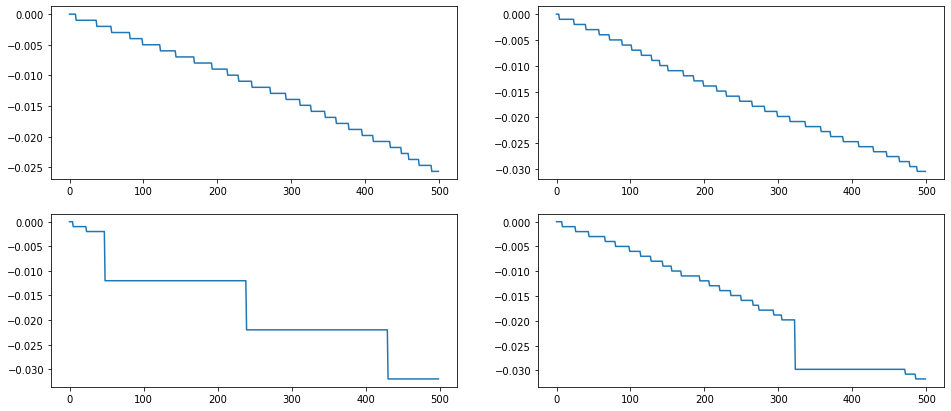

In [19]:
plt.figure(0, figsize=(16,7))

x_axis = np.asarray(range(0, len(States_track['x-x-x-2-5-x-x-x-x'][(5,7)])))
plt.subplot(221)
plt.plot(x_axis,np.asarray(States_track['x-x-x-2-5-x-x-x-x'][(5,7)]))
plt.show

x_axis = np.asarray(range(0, len(States_track['x-3-x-2-x-x-x-x-x'][(4,1)])))
plt.subplot(222)
plt.plot(x_axis,np.asarray(States_track['x-3-x-2-x-x-x-x-x'][(4,1)]))
plt.show

x_axis = np.asarray(range(0, len(States_track['1-4-x-x-x-x-x-x-x'][(4,5)])))
plt.subplot(223)
plt.plot(x_axis,np.asarray(States_track['1-4-x-x-x-x-x-x-x'][(4,5)]))
plt.show

x_axis = np.asarray(range(0, len(States_track['x-2-x-x-x-x-x-7-x'][(2,3)])))
plt.subplot(224)
plt.plot(x_axis,np.asarray(States_track['x-2-x-x-x-x-x-7-x'][(2,3)]))
plt.show

As we see from the above Plots that the Q-values are Converging.

### Epsilon - decay check

In [26]:
max_epsilon = 1.0
min_epsilon = 0.001
time = np.arange(0,50000)
epsilon = []
for i in range(0,50000):
    epsilon.append(min_epsilon + (max_epsilon - min_epsilon) * np.exp(-0.0001*i))

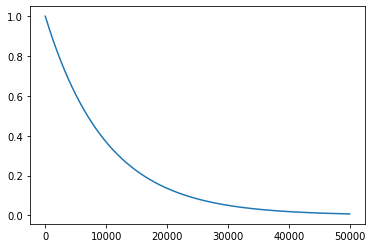

In [27]:
plt.plot(time, epsilon)
plt.show()